In [164]:
#Task-4
#Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
cols=['TweetID', 'Topic', 'Target', 'Text']

train = pd.read_csv('/content/twitter_training.csv', names = cols)

valid = pd.read_csv('/content/twitter_validation.csv', names = cols)

train.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [167]:
valid.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [168]:
dataset = pd.concat([train, valid], ignore_index = False)
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [169]:
dataset.describe(include = 'object')

,Topic,Target,Text
count,75682,75682,74996
unique,32,4,69974
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [170]:
dataset['Topic'].value_counts()

Topic
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                      

<Axes: xlabel='Topic'>

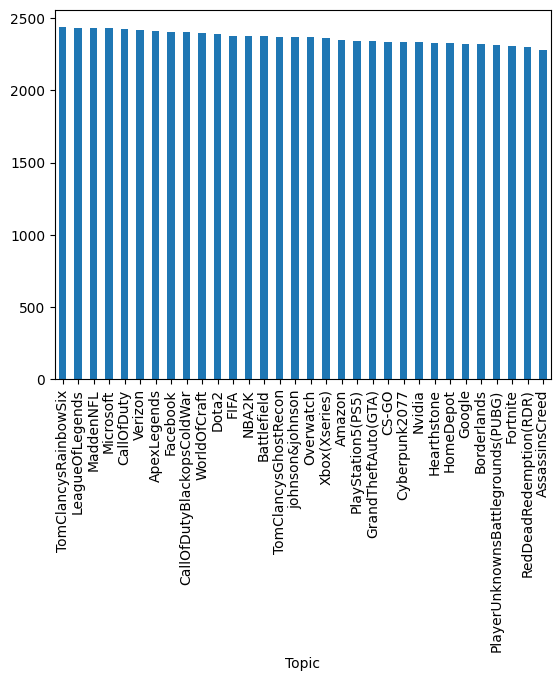

In [171]:
dataset['Topic'].value_counts().plot(kind = 'bar')

In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TweetID  75682 non-null  int64 
 1   Topic    75682 non-null  object
 2   Target   75682 non-null  object
 3   Text     74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [173]:
dataset.isnull().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [174]:
dataset.shape

(75682, 4)

In [175]:
dataset.duplicated().sum()

3217

In [176]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
dataset.duplicated().sum()

0

<Axes: xlabel='Target', ylabel='Topic'>

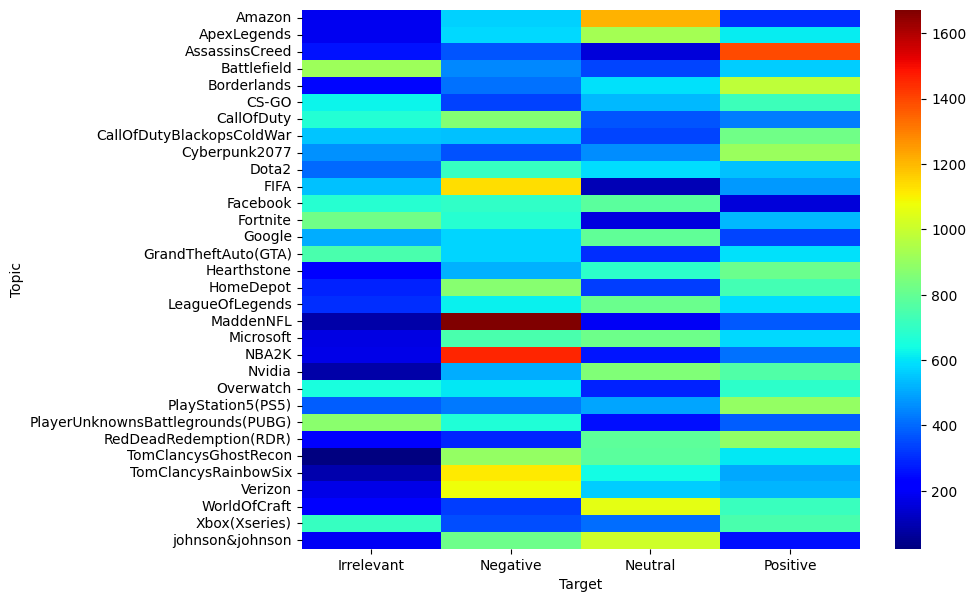

In [177]:
plt.figure(figsize=(9, 7))
crosstab = pd.crosstab(index=dataset['Topic'], columns=dataset['Target'])
sns.heatmap(crosstab, cmap = 'jet')

In [178]:
crosstab.head()

Target,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,978


In [179]:
dataset['Topic'].values

array(['Borderlands', 'Borderlands', 'Borderlands', ..., 'CallOfDuty',
       'GrandTheftAuto(GTA)', 'CS-GO'], dtype=object)

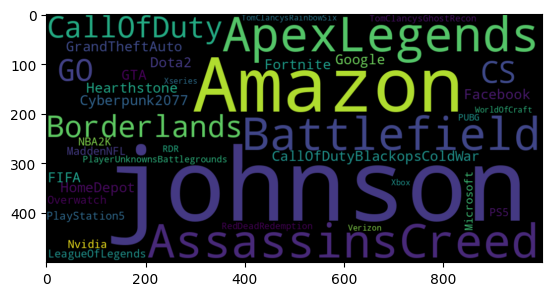

In [180]:
# WORD CLOUD
from wordcloud import WordCloud
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.imshow(wc, interpolation='bilinear')

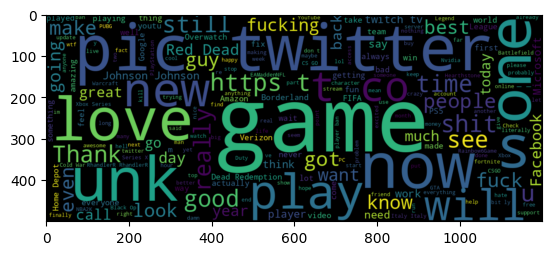

In [181]:
corpus = ' '.join(dataset['Text'])
wc2 = WordCloud(width=1200, height=500).generate(corpus)
plt.imshow(wc2, interpolation='bilinear')

In [182]:
import re

In [183]:
text = dataset['Text']
text.head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Text, dtype: object

In [184]:
dataset['Text'] = dataset['Text'].astype(str)

In [185]:
l = []
text = dataset['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l)

[<class 'str'>]


In [186]:
!pip install nltk
from nltk.tokenize import word_tokenize

In [187]:
text[0], len(text), type(word_tokenize(text[0]))

('im getting on borderlands and i will murder you all ,', 72139, list)

In [188]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
type(text[0])

str

In [190]:
from nltk.tokenize import word_tokenize
modified_text = []
rows = len(text)

for ithText in dataset['Text']:

    ithText = ithText.lower()  # Make text lowercase
    ithText = re.sub(r'[^\w\s]', '', ithText) # Remove punctuations and commas
    ithText = re.sub(r'\d+', '', ithText)


    tokens = word_tokenize(ithText)  # Extract tokens of each word
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)  # ith doc contents are tokenized and stored back

print(modified_text[1:3])

['coming borders kill', 'im getting borderlands kill']


In [191]:
dataset.drop('Text', axis =1 , inplace = True)
dataset.head()

,TweetID,Topic,Target
0,2401,Borderlands,Positive
1,2401,Borderlands,Positive
2,2401,Borderlands,Positive
3,2401,Borderlands,Positive
4,2401,Borderlands,Positive


In [192]:
dataset['Text'] = modified_text
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder
